In [1]:
using Plots

In [2]:
4*(1-1/3+1/5-1/7+1/9-1/11+1/13-1/15+1/17-1/19)

3.0418396189294032

In [3]:
function calcPi(n::Integer)
  n > 0 || throw(ArgumentError("The input n must be positive."))
  local sum = 1.0
  for k=1:n
    sum += (-1)^k/(2k+1)
  end
  4*sum
end


calcPi (generic function with 1 method)

In [4]:
pi10_000 = calcPi(10_000)

3.1416926435905346

In [7]:
absErr(x::Real)=abs(x-pi)

absErr (generic function with 1 method)

In [6]:
absErr(pi10_000)

9.99900007414567e-5

In [7]:
errors = map(n->absErr(calcPi(10^n)),1:7)

7-element Vector{Float64}:
 0.09072315581580082
 0.009900747481198291
 0.0009990007497511222
 9.99900007414567e-5
 9.999899927226608e-6
 9.999989813991306e-7
 9.999998829002266e-8

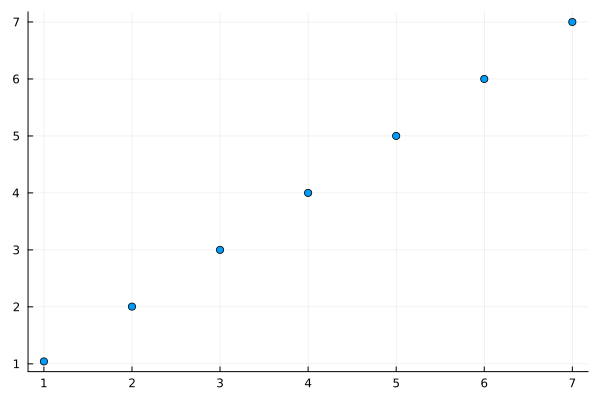

In [8]:
scatter(1:7,-log10.(errors), legend=false)

In [9]:
savefig("../assets/plots/calc-pi/pi-atan-error.png")

"/Users/pstaab/code/sci-comp-book/assets/plots/calc-pi/pi-atan-error.png"

In [10]:
@time calcPi(1_000_000)

  0.079734 seconds


3.1415936535887745

In [11]:
0.077268 * 10^14 /60/60/24/365

245015.2207001522

In [12]:
function atan_series(x::Real,n::Integer)
  n > 0 || throw(ArgumentError("The input n must be positive."))
  local sum = x
  for k=1:n
    sum += (-1)^k*x^(2k+1)/(2k+1)
  end
  sum
end

atan_series (generic function with 1 method)

In [13]:
4*(atan_series(1/2,10)+atan_series(1/3,10))

3.1415926704506854

In [14]:
absErr(4*(atan_series(1/2,10)+atan_series(1/3,10)))

1.6860892237957614e-8

In [15]:
absErr(4*(atan_series(1/2,20)+atan_series(1/3,20)))

7.993605777301127e-15

In [16]:
4*(atan_series(1/big(2),20)+atan_series(1/big(3),20))

3.141592653589801775394859982612606961085892242193168775435423632752985359741545

In [17]:
errors2=map(n -> absErr(4*(atan_series(1/big(2), 10n) + atan_series(1/big(3), 10n))), 1:5)

5-element Vector{BigFloat}:
 1.686089269049955549324338738573041181676956757596130409476023763757476121934317e-08
 8.536932216599333104076888722842818062954460479040445168953455346681077569196179e-15
 5.541360098004753291440085860743946761847969162268014510791810751138256936210001e-21
 4.005347048909364704518520476811412326265959273017889120734252574465535050431139e-27
 3.075296346725383632749782433311833539450331895967037047902902585859740513243069e-33

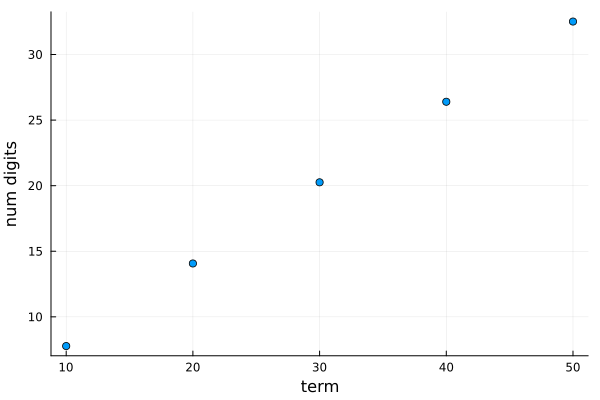

In [18]:
scatter(10:10:50, -log10.(errors2), xlabel="term", ylabel="num digits", legend=false)

In [19]:
savefig("../assets/plots/calc-pi/error-euler.png")

"/Users/pstaab/code/sci-comp-book/assets/plots/calc-pi/error-euler.png"

In [20]:
@time absErr(4*(atan_series(1/big(2),100)+atan_series(1/big(3),100)))

  0.000257 seconds (1.82 k allocations: 93.180 KiB)


1.228611811943582079576172348238260677444453102891747999520879961795376821279531e-63

In [21]:
absErr(4*(atan_series(1/big(2),100)+atan_series(1/big(3),100)))

1.228611811943582079576172348238260677444453102891747999520879961795376821279531e-63

In [22]:
setprecision(4096) do
  print(length(string(1/big(3))))
end

1237

In [23]:
setprecision(4096) do
  @show pi1000=4*(atan_series(1/big(2),1594)+atan_series(1/big(3),1594))
  absErr(pi1000)
end

pi1000 = 4 * (atan_series(1 / big(2), 1594) + atan_series(1 / big(3), 1594)) = 3.1415926535897932384626433832795028841971693993751058209749445923078164062862089986280348253421170679821480865132823066470938446095505822317253594081284811174502841027019385211055596446229489549303819644288109756659334461284756482337867831652712019091456485669234603486104543266482133936072602491412737245870066063155881748815209209628292540917153643678925903600113305305488204665213841469519415116094330572703657595919530921861173819326117931051185480744623799627495673518857527248912279381830119491298336733624406566430860213949463952247371907021798609437027705392171762931767523846748184676694051320005681271452635608277857713427577896091736371787214684409012249534301465495853710507922796892589235420199561121290219608640344181598136297747713099605187072113499999983729780499510597317328160963185950244594553469083026425223082533446850352619311881710100031378387528865875332083814206171776691473035982534904287554687

2.59753510954587549041954911578576968036221315072936349312950931876487384192401926677097525464278225299414684505498777136669660116148513136006695968861964989941439216721754591082904719608634594616392512916622323685658962463281205982609391064634574796309171744837612185612101204128694651765250058248078994384811963299937904933599005224547594823182022661059213312490079780977757246879563016426335508606371749241902283998426316148796391580469170426352910426319652918451665270362034523198131782960829298949007348807405472694328289979618164034441631663545144846999773632841776232901221840207501789328736249335700746828729427230764498795408649476985244226324790566308930085994284695623644947687903257440310119306015963290860262892421101793412793932009293146602730310574730819130786927986914991625551144944447419758030329746237399190312380866556852808327589808717954196988226808255292397501893694733478472519641951247067462448611333220383790605839159766360694555187816095724378641783866218065689572174814658

In [24]:
pi1000

UndefVarError: UndefVarError: `pi1000` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [5]:
numDigits(pi_approx::Real) = floor(Int,-log10(absErr(pi_approx)))

numDigits (generic function with 1 method)

In [26]:
setprecision(4096) do
  @show pi1000=4*(atan_series(1/big(2),1594)+atan_series(1/big(3),1594))
  numDigits(pi1000)
end

pi1000 = 4 * (atan_series(1 / big(2), 1594) + atan_series(1 / big(3), 1594)) = 3.1415926535897932384626433832795028841971693993751058209749445923078164062862089986280348253421170679821480865132823066470938446095505822317253594081284811174502841027019385211055596446229489549303819644288109756659334461284756482337867831652712019091456485669234603486104543266482133936072602491412737245870066063155881748815209209628292540917153643678925903600113305305488204665213841469519415116094330572703657595919530921861173819326117931051185480744623799627495673518857527248912279381830119491298336733624406566430860213949463952247371907021798609437027705392171762931767523846748184676694051320005681271452635608277857713427577896091736371787214684409012249534301465495853710507922796892589235420199561121290219608640344181598136297747713099605187072113499999983729780499510597317328160963185950244594553469083026425223082533446850352619311881710100031378387528865875332083814206171776691473035982534904287554687

963

In [27]:
@time setprecision(4096) do
  pi1000=4*(atan_series(1/big(2),1700)+atan_series(1/big(3),1700))
  numDigits(pi1000)
end

  0.095727 seconds (49.16 k allocations: 10.358 MiB, 9.36% gc time, 15.63% compilation time)


1027

In [28]:
function atan_series2(x::Real,n::Integer)
  n > 0 || throw(ArgumentError("The input n must be positive."))
  local negxsq = -x^2
  local sum = 1
  local ak=1
  for k=2:n
    ak *= negxsq
    sum += ak/(2k-1)
  end
  x*sum
end

atan_series2 (generic function with 1 method)

In [29]:
using BenchmarkTools

In [30]:
@btime setprecision(2^14) do
  numDigits(4*(atan_series(1/big(2),1700)+atan_series(1/big(3),1700)))
end

  399.951 ms (30633 allocations: 35.60 MiB)


1027

In [31]:
@btime setprecision(2^14) do
  numDigits(4*(atan_series2(1/big(2),1700)+atan_series2(1/big(3),1700)))
end

  45.818 ms (20433 allocations: 21.67 MiB)


1026

In [32]:
2^14

16384

In [33]:
setprecision(2^22) do
  length(string(1/big(3)))
end

1262615

In [34]:
@time setprecision(2^22) do
  numDigits(4*(atan_series2(1/big(2),100)+atan_series2(1/big(3),100)))
end

 18.756047 seconds (180.73 k allocations: 5.190 GiB, 3.04% gc time, 0.10% compilation time)


62

In [35]:
1_000_000/63 * 13.15 / 60 /60

57.98059964726632

In [36]:
function machin(coeffs::Vector{Int}, xvals::Vector{T},n::Int) where T <: Integer
  length(coeffs) == length(xvals) || throw(ArgumentError("The lengths of the vectors must match"))
  local sum=big(0)
  for i=1:length(coeffs)
    sum += coeffs[i]*atan_series2(1/big(xvals[i]),n)
  end
  4*sum
end

machin (generic function with 1 method)

In [37]:
setprecision(2^14) do
  numDigits(machin([1,1],[2,3],100))
end

62

In [38]:
@time setprecision(2^22) do
  numDigits(machin([4,-1],[5,239], 100))
end

 16.316848 seconds (116.36 k allocations: 4.161 GiB, 4.30% gc time, 0.11% compilation time)


141

In [39]:
@time setprecision(2^22) do
  numDigits(machin([4,-1],[5,239], 200))
end

 17.260348 seconds (128.60 k allocations: 6.190 GiB, 5.93% gc time, 0.10% compilation time)


281

In [40]:
@time setprecision(2^22) do
  numDigits(machin([4,-1],[5,239], 400))
end

 26.974207 seconds (153.00 k allocations: 10.245 GiB, 6.53% gc time, 0.06% compilation time)


561

In [41]:
1_000_000/561 * 27.4 /60 / 60

13.567042978807685

### Takano's method

In [42]:
@time setprecision(2^22) do
  numDigits(machin([44,7,-12,24],[57,239,682,12943], 100))
end

 16.336060 seconds (130.62 k allocations: 6.236 GiB, 6.07% gc time, 0.10% compilation time)


352

In [43]:
@time setprecision(2^22) do
  numDigits(machin([44,7,-12,24],[57,239,682,12943], 200))
end

 29.504017 seconds (155.00 k allocations: 10.291 GiB, 6.26% gc time, 0.06% compilation time)


704

In [44]:
1_000_000/704 * 27.553502 /60/60

10.871804766414142

### Parker's method

In [45]:
@time setprecision(2^22) do
  numDigits(machin([83,17,-22,-24,-44,12,22],
    [big(107),big(1710),big(103697),big(2513489),big(18280007883),big(7939642926390344818), big(3054211727257704725384731479018)], 100))
end

 25.689139 seconds (233.15 k allocations: 9.350 GiB, 6.73% gc time, 0.26% compilation time)


407

In [46]:
@time setprecision(2^22) do
  numDigits(machin([83,17,-22,-24,-44,12,22],
    [big(107),big(1710),big(103697),big(2513489),big(18280007883),big(7939642926390344818), big(3054211727257704725384731479018)], 200))
end

 45.513066 seconds (242.34 k allocations: 16.445 GiB, 7.24% gc time, 0.06% compilation time)


813

In [47]:
@time setprecision(2^22) do
  numDigits(machin([83,17,-22,-24,-44,12,22],
    [big(107),big(1710),big(103697),big(2513489),big(18280007883),big(7939642926390344818), big(3054211727257704725384731479018)], 400))
end

 83.266263 seconds (327.76 k allocations: 30.640 GiB, 7.64% gc time, 0.03% compilation time)


1625

In [48]:
1_000_000/813 *43.7068/60/60

14.933305999726665

In [49]:
function chud(n::Integer)
  sum = big(0)
  for k=0:n
    ak =  (-1)^k*factorial(big(6k))/factorial(big(3k))/ factorial(big(k))^3/ (big(640320)^3)^(k+0.5)
    sum += big(545140134)*k*ak + big(13591409)*ak
  end
  1/(12sum)
end

chud (generic function with 1 method)

In [50]:
@time setprecision(2^22) do
  numDigits(chud(20))
end

150.715615 seconds (1.78 M allocations: 49.943 GiB, 1.76% gc time, 0.04% compilation time)


297

In [12]:
function chudnovsky(n::Integer)
  local sum1 = big(1.0)
  local sum2 = big(0.0)
  local top = big(1)
  local bottom = big(1)
  local C = big(640320)^3
  for k=1:n
    top *= -24*(6*k-5)*(2*k-1)*(6*k-1)
    bottom *= C*k^3
    sum1 += top/bottom
    sum2 += k * top/bottom
  end
  426880*sqrt(big(10005))/(13591409*sum1 + 545140134*sum2)
end

chudnovsky (generic function with 1 method)

In [13]:
@time setprecision(2^22) do
  numDigits(chudnovsky(20))
end

  7.650933 seconds (181.37 k allocations: 3.083 GiB, 4.64% gc time, 0.36% compilation time)


297

In [14]:
@time setprecision(2^22) do
  numDigits(chudnovsky(40))
end

  9.611015 seconds (207.36 k allocations: 4.028 GiB, 4.56% gc time, 0.10% compilation time)


581

In [54]:
@time setprecision(2^22) do
  numDigits(chudnovsky(80))
end

 14.364569 seconds (284.09 k allocations: 5.921 GiB, 7.08% gc time, 0.07% compilation time)


1148

In [55]:
1_000_000/1148 * 15.18/60/60

3.6730545876887337

In [56]:
@time setprecision(2^22) do
  numDigits(chudnovsky(200))
end

 32.081879 seconds (514.24 k allocations: 11.598 GiB, 7.89% gc time, 0.04% compilation time)


2850

In [58]:
1_000_000/2850 * 32.08/60/60

3.126705653021442

In [2]:
using Distributed
addprocs(3)

3-element Vector{Int64}:
 6
 7
 8

In [3]:
@everywhere function paraChud(n1::Integer,n2::Integer,prec::Integer)
  setprecision(prec)
  local C = big(640320)^3
  local bottom = big(1)
  local top = big(1)
  for k=1:n1
    bottom *= k^3*C
    top *= -8*(6k-1)*(6k-3)*(6k-5)
  end
  local sum1 = n1*top/bottom
  local sum2 = top/bottom
  for k=n1+1:n2
    bottom *= k^3*C
    top *= -8*(6k-1)*(6k-3)*(6k-5)
    sum1 += k*top/bottom
    sum2 += top/bottom
  end
  545140134*sum1 + 13591409*sum2
end

In [9]:
@time let
  prec = 2^22
  p1 = paraChud(0,9,prec)
  p2 = paraChud(10,19,prec)
  p3 = paraChud(20,29,prec)
  p4 = paraChud(30,39,prec)
  numDigits(sqrt(big(640320)^3)/(12*(p1+p2+p3+p4)))
end

 10.849719 seconds (164.81 k allocations: 4.026 GiB, 5.38% gc time)


567

In [10]:
@time setprecision(2^22) do
  local p = pmap(i->paraChud(10*(i-1),10i-1,2^22),1:4)
  local s = sum(p)
  numDigits(sqrt(big(640320)^3)/(12s))
end

 10.676557 seconds (2.96 M allocations: 2.277 GiB, 1.00% gc time, 9.98% compilation time)


567

In [11]:
@time setprecision(2^22) do
  local p = pmap(i -> paraChud(10*(i-1), 10i-1, 2^22),1:8)
  local s = sum(p)
  numDigits(sqrt(big(640320)^3)/(12s))
end

 11.959962 seconds (1.05 M allocations: 2.183 GiB, 1.99% gc time, 3.86% compilation time)


1134

In [83]:
@time setprecision(2^22) do
  local p = pmap(i->paraChud(50*(i-1),50i-1,2^22),1:8)
  local s = sum(p)
  numDigits(sqrt(big(640320)^3)/(12s))
end

 21.931441 seconds (1.03 M allocations: 2.181 GiB, 1.20% gc time, 0.84% compilation time)


5672

In [15]:
@time setprecision(2^22) do
  local p = pmap(i->paraChud(100*(i-1),100i-1,2^22),1:8)
  local s = sum(p)
  numDigits(sqrt(big(640320)^3)/(12s))
end

 48.279909 seconds (1.03 M allocations: 2.181 GiB, 0.30% gc time, 0.46% compilation time)


11345

In [16]:
1_000_000/11345 *48.446 /60

71.17085353312767